In [2]:
import pandas as pd

df = pd.read_csv('data/cctv_seoul.csv')

def percentage(a,b):
    return a/b * 100

df['CCTV비율'] = df.apply(lambda x: percentage(x['CCTV수'], x['인구수']), axis = 1)
df['노인비율'] = df.apply(lambda x: percentage(x['고령자'], x['인구수']), axis = 1)
display(df.head())

,구별,CCTV수,인구수,한국인,외국인,고령자,CCTV비율,노인비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673,12.955291


,클릭시간,상품ID
0,201612120944,p001
1,201612120944,p003
2,201612120944,p003
3,201612120945,p008
4,201612121052,p008


,상품ID,클릭횟수
1,p002,60
2,p003,60
6,p008,40
8,p010,40
0,p001,30
7,p009,30
3,p004,20
4,p006,20
5,p007,10


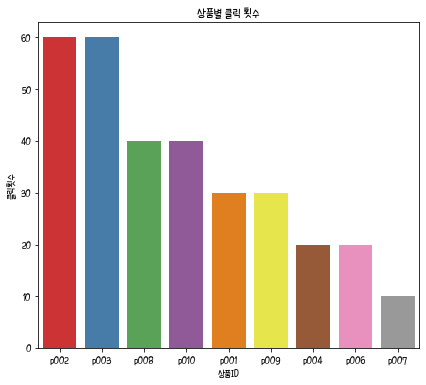

In [13]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt    
import seaborn as sns

df = pd.read_csv('data/product_click_new.log',sep = '\s+', header = None)
df.columns = ['클릭시간', '상품ID']
display(df.head())
grouped = df.groupby(['상품ID'])
a = []
b = []

for key, group in grouped:
    a.append(key)
    b.append(len(group))

df2 = pd.DataFrame([a,b], index = ['상품ID', '클릭횟수'])    
df2 = df2.T
df2.sort_values(by = '클릭횟수', ascending = False, inplace = True)
display(df2)

fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
sns.barplot(x = '상품ID', y = '클릭횟수', palette='Set1', data = df2, ax = ax1)
ax1.set_title('상품별 클릭 횟수')

df2.set_index('상품ID', inplace = True)
#df2.plot(kind = 'bar', figsize = (8,6))


plt.show()